In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

  player_name                        home_team           away_team  year  \
0  T. Ratoviz  Maryland College Park Terrapins         UCLA Bruins  2024   
1  T. Ratoviz                      UCLA Bruins  Washington Huskies  2024   
2  T. Ratoviz                      UCLA Bruins    Indiana Hoosiers  2024   
3  T. Ratoviz  Maryland College Park Terrapins         UCLA Bruins  2024   
4  T. Ratoviz          Rutgers Scarlet Knights         UCLA Bruins  2024   

          team                                              Match  \
0  UCLA Bruins  Maryland College Park Terrapins - UCLA Bruins 0:6   
1  UCLA Bruins               UCLA Bruins - Washington Huskies 0:1   
2  UCLA Bruins                 UCLA Bruins - Indiana Hoosiers 1:2   
3  UCLA Bruins  Maryland College Park Terrapins - UCLA Bruins 1:1   
4  UCLA Bruins          Rutgers Scarlet Knights - UCLA Bruins 0:3   

                      Competition      Date  Position  Minutes played  ...  \
0  United States. NCAA D1 Big Ten   11/7/24     RC

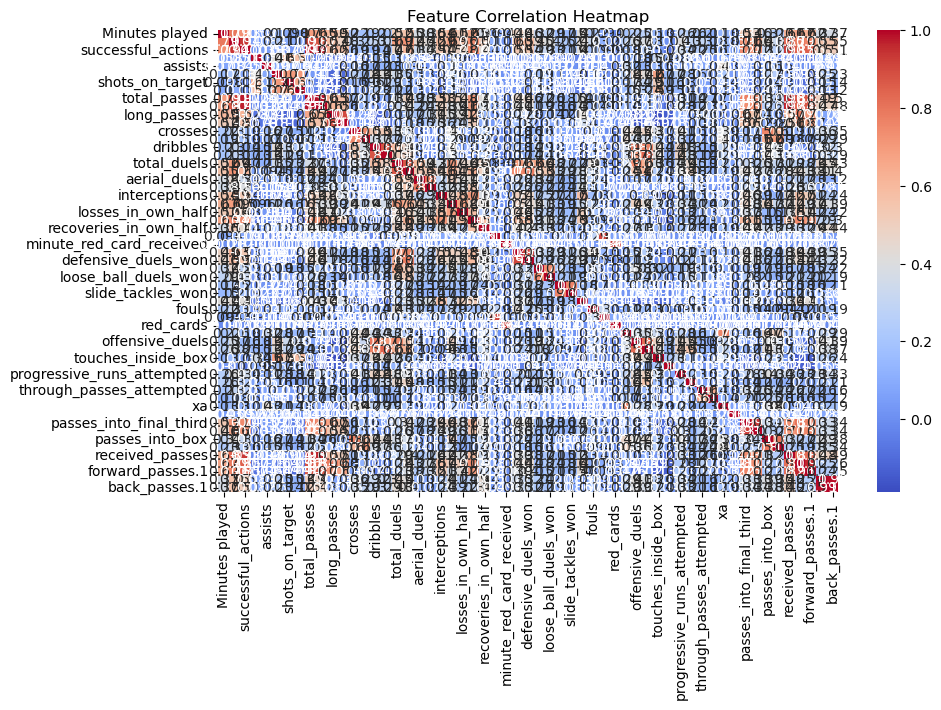

In [2]:
# Load the data
file_path = '/Users/vrishfish/Mens-Soccer-Stats-1/player-combined-data.csv'  
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())

# Drop any missing values
data.dropna(inplace=True)

# Drop goalkeeper stats and create a cleaned DataFrame
df = data.drop(columns=[
    'gk_stat_conceded_goals', 'gk_stat_xcg', 'gk_stat_shots_against', 
    'gk_stat_saves', 'gk_stat_reflex_saves', 'gk_stat_box_exits', 
    'gk_stat_passes_to_gk', 'gk_stat_passes_to_gk_completed', 
    'gk_stat_goal_kicks_attempted', 'gk_stat_short_goal_kicks', 
    'gk_stat_long_goal_kicks', 'year'
])

# Recalculate numeric columns from the cleaned DataFrame
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Standardize numeric columns for clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[numeric_cols])

# Generate and display the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [3]:
# # List of specific columns for the heatmap
# selected_columns = ['goals','forward_passes', 'accurate_crosses', 'long_passes_completed','xg','total_passes_completed']

# # Subset the DataFrame to include only the selected columns
# subset = data[selected_columns]

# # Drop any missing values in the subset (optional, to avoid errors)
# subset.dropna(inplace=True)

# # Generate the correlation heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(subset.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap for Selected Features')
# plt.show()

In [4]:
# # Separate data for Northwestern Wildcats
# northwestern_data = data[data['team'] == 'Northwestern Wildcats']

# # Separate data for other teams
# other_teams_data = data[data['team'] != 'Northwestern Wildcats']

# # Display first few rows to confirm separation
# print("Northwestern Wildcats Data:")
# print(northwestern_data.head())

# print("\nOther Teams Data:")
# print(other_teams_data.head())

# # Optional: Get the number of rows in each dataset
# print("\nNumber of rows in Northwestern Wildcats Data:", len(northwestern_data))
# print("Number of rows in Other Teams Data:", len(other_teams_data))


In [5]:
# # Calculate averages for key metrics
# metrics = ['goals', 'assists', 'shots', 'xg']  # Replace with relevant columns
# northwestern_avg = northwestern_data[metrics].mean()
# other_teams_avg = other_teams_data[metrics].mean()

# # Create a bar plot
# plt.figure(figsize=(10, 6))
# northwestern_avg.plot(kind='bar', alpha=0.7, label='Northwestern Wildcats')
# other_teams_avg.plot(kind='bar', alpha=0.7, label='Other Teams', color='orange')
# plt.title('Average Performance Metrics: Northwestern vs Other Teams')
# plt.ylabel('Average Value')
# plt.legend()
# plt.show()


In [6]:
# import seaborn as sns

# # Combine data for boxplot
# combined_data = northwestern_data.copy()
# combined_data['group'] = 'Northwestern'
# other_teams_data['group'] = 'Other Teams'
# combined_data = pd.concat([combined_data, other_teams_data])

# # Create a box plot for goals
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=combined_data, x='group', y='goals')
# plt.title('Goals Distribution: Northwestern vs Other Teams')
# plt.xlabel('Team Group')# Create KDE plot for 'goals'
# plt.figure(figsize=(10, 6))
# sns.kdeplot(northwestern_data['goals'], label='Northwestern', shade=True)
# sns.kdeplot(other_teams_data['goals'], label='Other Teams', shade=True, color='orange')
# plt.title('Goals Distribution (KDE): Northwestern vs Other Teams')
# plt.xlabel('Goals')
# plt.ylabel('Density')
# plt.legend()
# plt.show()
# plt.ylabel('Goals')
# plt.show()

In [7]:
# Assuming 'Match' is the column in your DataFrame containing the match strings
matches = df['Match']  # Replace 'Match' with the actual column name containing match data

# Function to determine the winner
def determine_winner(match):
    try:
        # Split the match string into parts
        parts = match.rsplit(' ', 1)  # Split into teams and scores
        teams = parts[0].split(' - ')  # Split teams
        scores = list(map(int, parts[1].split(':')))  # Split scores and convert to integers
        
        if scores[0] > scores[1]:
            return f"Winner: {teams[0]}"
        elif scores[0] < scores[1]:
            return f"Winner: {teams[1]}"
        else:
            return "Draw"
    except (IndexError, ValueError):
        # Handle cases with missing or malformed data
        return "Invalid Match Format"

# Apply the function to the match column
df['Result'] = matches.apply(determine_winner)

# Display the updated DataFrame
print(df[['Match', 'Result']])





                                                  Match  \
0     Maryland College Park Terrapins - UCLA Bruins 0:6   
1                  UCLA Bruins - Washington Huskies 0:1   
2                    UCLA Bruins - Indiana Hoosiers 1:2   
3     Maryland College Park Terrapins - UCLA Bruins 1:1   
4             Rutgers Scarlet Knights - UCLA Bruins 0:3   
...                                                 ...   
8630      Penn State Nittany Lion - Cornell Big Red 2:3   
8631  Penn State Nittany Lion - St. Bonaventure Bonn...   
8632  Penn State Nittany Lion - Pittsburgh Panthers 1:2   
8633  Penn State Nittany Lion - Army West Point Blac...   
8634       Clemson Tigers - Penn State Nittany Lion 3:0   

                               Result  
0                 Winner: UCLA Bruins  
1          Winner: Washington Huskies  
2            Winner: Indiana Hoosiers  
3                                Draw  
4                 Winner: UCLA Bruins  
...                               ...  
8630       

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter matches won and lost
matches_won = df[df['Result'].str.contains('Winner')]  # Matches the team won
matches_lost = df[~df['Result'].str.contains('Winner') & ~df['Result'].str.contains('Draw')]  # Matches the team lost

# Group player stats by 'team' for matches won and lost
# Selecting only numerical columns for grouping
numerical_columns = df.select_dtypes(include=['number']).columns
player_stats_won = matches_won.groupby('team')[numerical_columns].mean()  # Mean stats for matches won
player_stats_lost = matches_lost.groupby('team')[numerical_columns].mean()  # Mean stats for matches lost

# Combine stats for comparison
comparison = player_stats_won.subtract(player_stats_lost, fill_value=0)  # Difference in stats
comparison['Match Count (Won)'] = matches_won['team'].value_counts()  # Count of matches won
comparison['Match Count (Lost)'] = matches_lost['team'].value_counts()  # Count of matches lost

# Display comparison DataFrame
print("Comparison of stats between matches won and lost:")
print(comparison)

# # Visualization of specific metrics
# stats_to_compare = ['goals', 'assists', 'shots']  # Replace with actual numeric columns in your dataset
# for stat in stats_to_compare:
#     if stat in numerical_columns:  # Ensure the column exists
#         plt.figure(figsize=(8, 5))
#         plt.bar(['Won', 'Lost'], [player_stats_won[stat].mean(), player_stats_lost[stat].mean()], color=['green', 'red'])
#         plt.title(f'Comparison of {stat.capitalize()}: Matches Won vs Matches Lost')
#         plt.ylabel(stat.capitalize())
#         plt.show()
#     else:
#         print(f"Column '{stat}' not found in numerical data.")


Comparison of stats between matches won and lost:
                            Minutes played  total_actions  successful_actions  \
team                                                                            
Air Force Falcons                12.229167       1.458333            0.875000   
Akron Zips                       20.818182      23.000000           18.909091   
Brown Bears                     -38.224806      -5.333333          -10.635659   
Butler Bulldogs                  90.000000      86.000000           57.000000   
CSUN Matadors                    72.625000      54.375000           33.541667   
...                                    ...            ...                 ...   
West Virginia Mountaineers      -18.864706      -0.941176            5.229412   
Wisconsin Badgers                74.871069      47.751572           29.827044   
Wofford Terriers                 81.000000      43.565217           19.130435   
Xavier Musketeers                -1.657143       1.514286  

Comparison of Northwestern Wildcats' stats between matches won and lost:
                                   Matches Won  Matches Lost
Minutes played                       62.885668     68.818182
total_actions                        39.228663     42.000000
successful_actions                   21.811594     18.454545
goals                                 0.082126      0.000000
assists                               0.037037      0.000000
shots                                 0.743961      1.727273
shots_on_target                       0.272142      0.727273
xg                                    0.080966      0.175455
total_passes                         18.755233     14.909091
total_passes_completed               13.842190      8.545455
long_passes                           2.595813      3.363636
long_passes_completed                 1.123994      1.545455
crosses                               0.908213      1.363636
accurate_crosses                      0.291465      0.272727
dribbles    

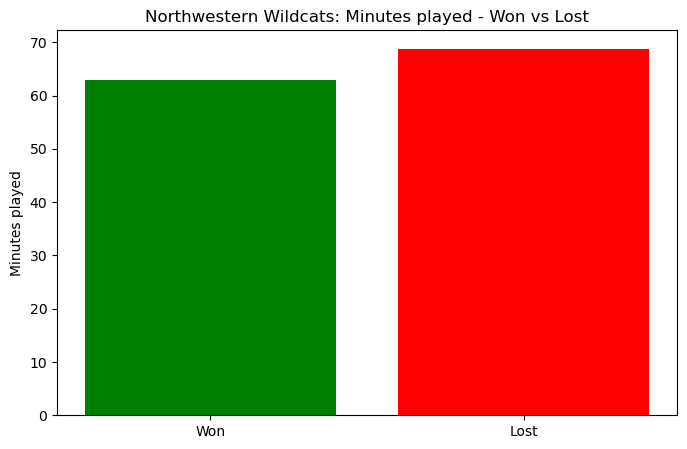

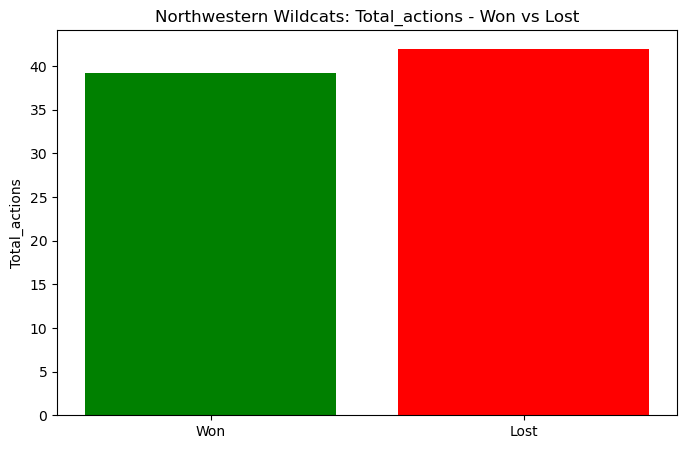

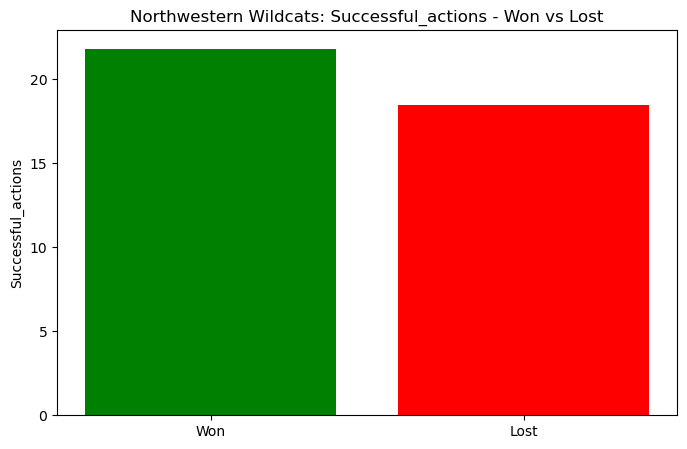

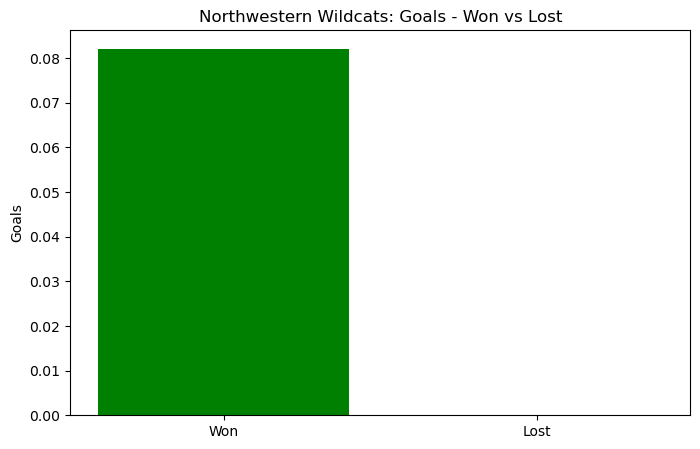

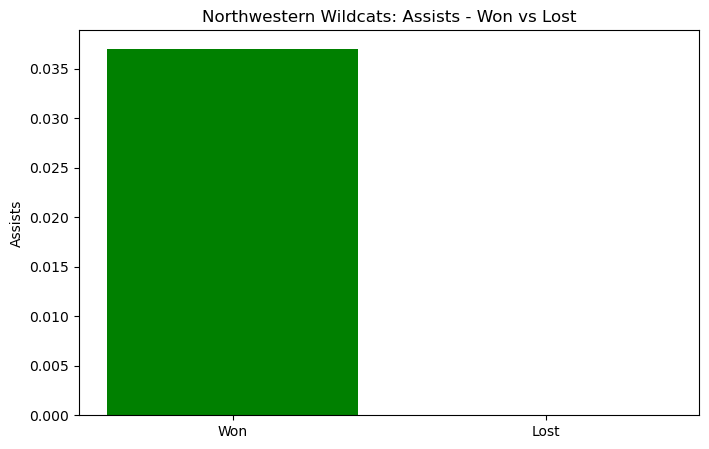

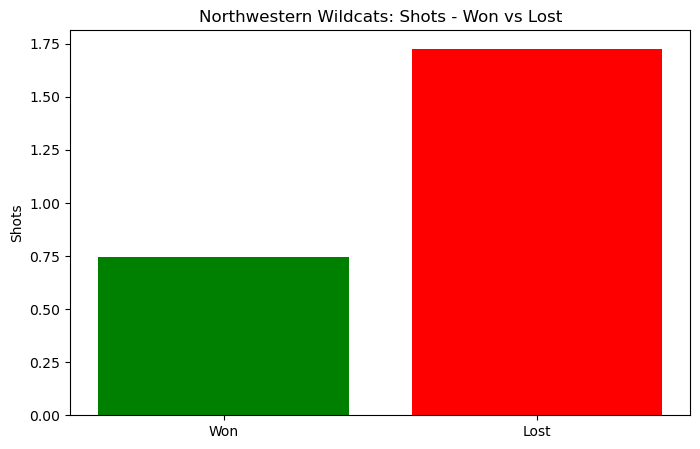

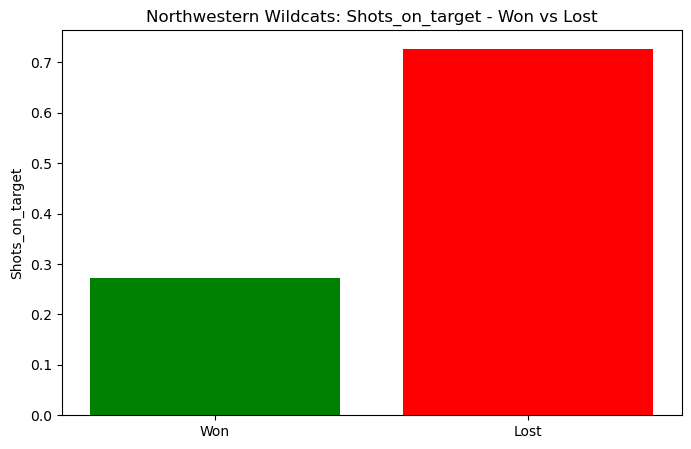

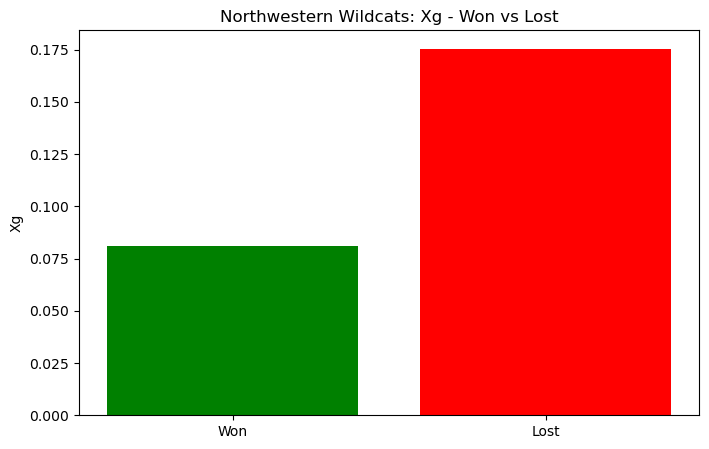

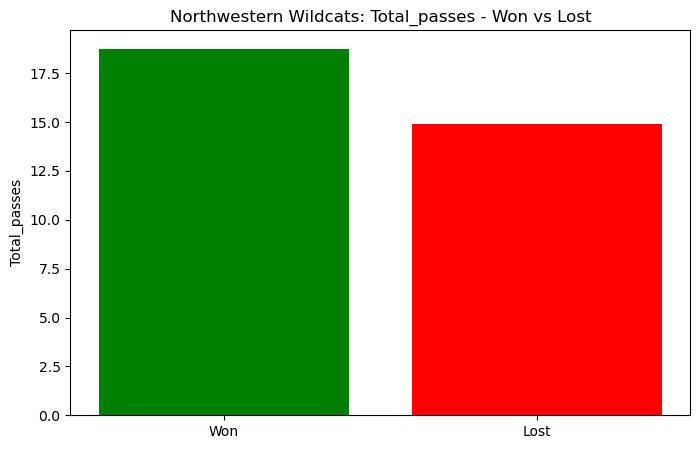

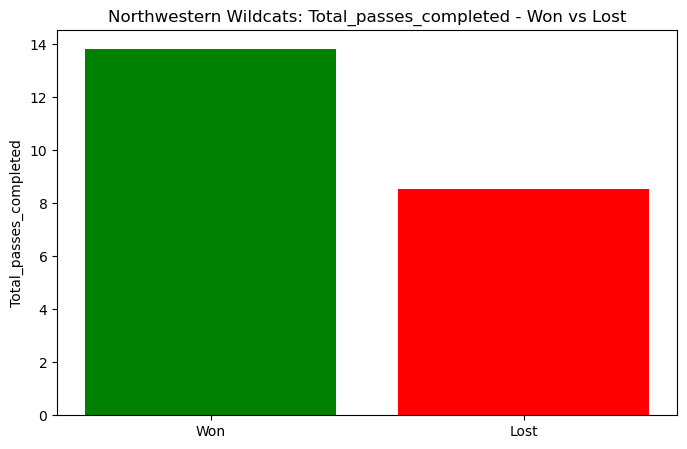

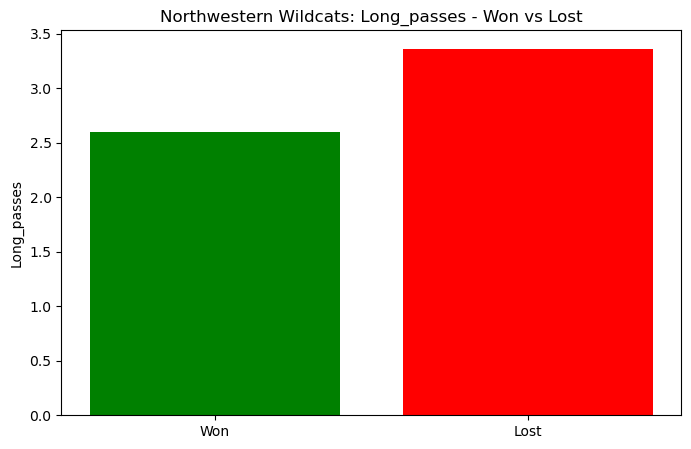

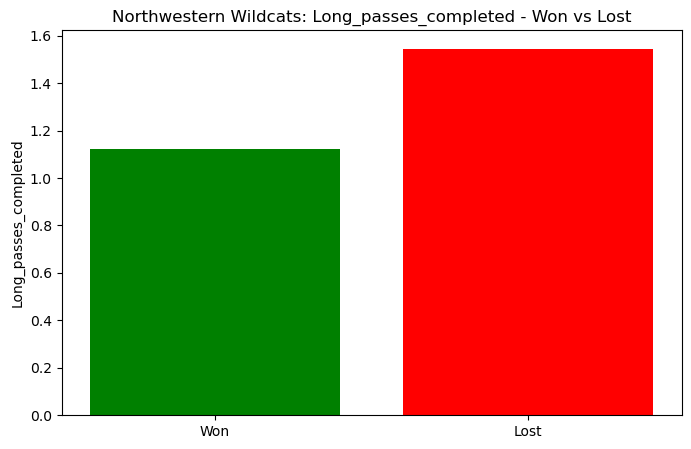

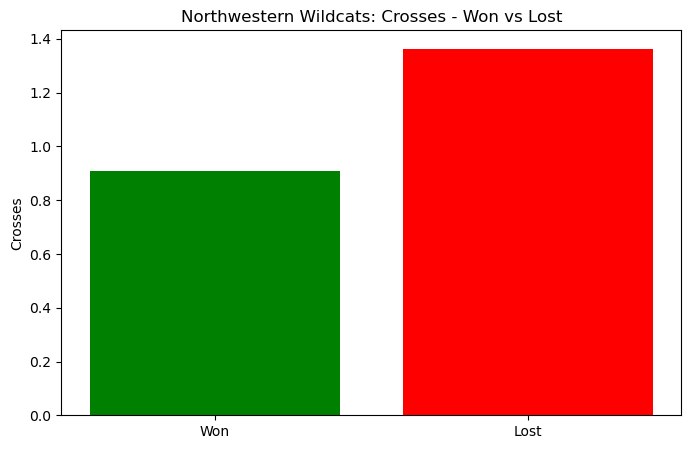

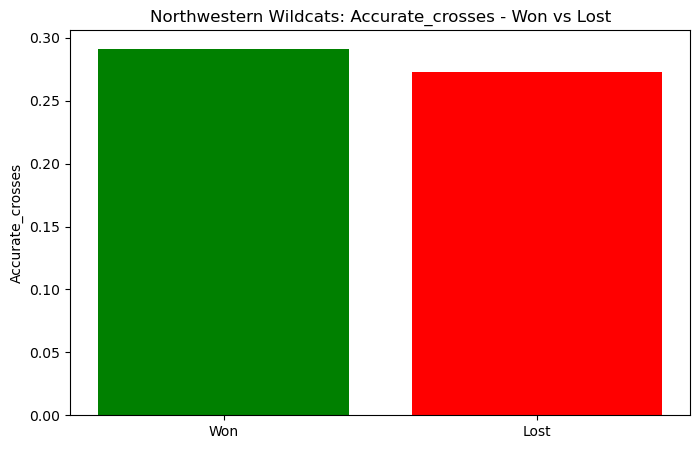

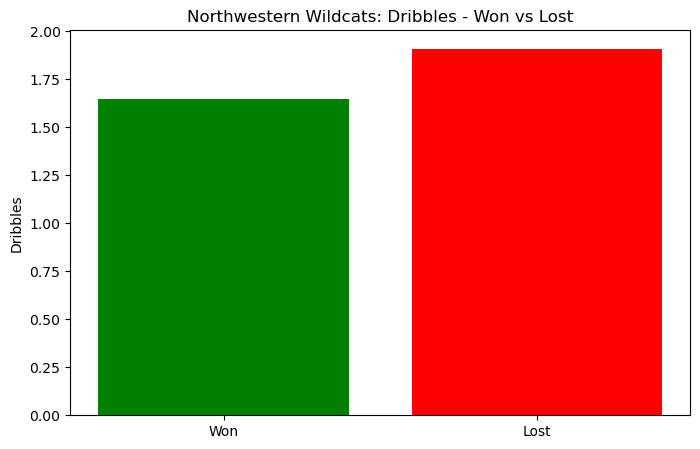

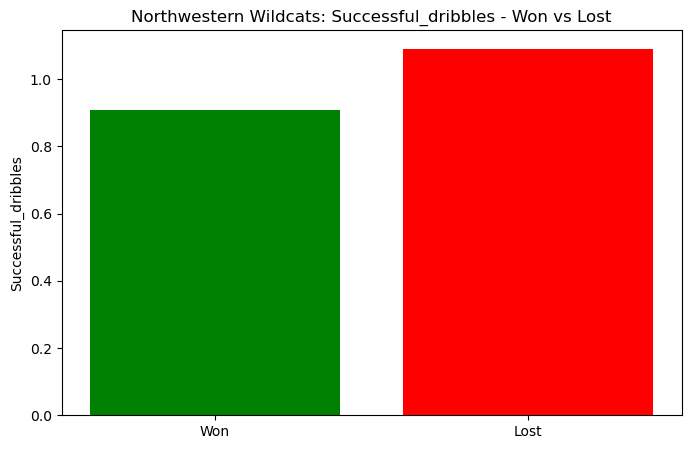

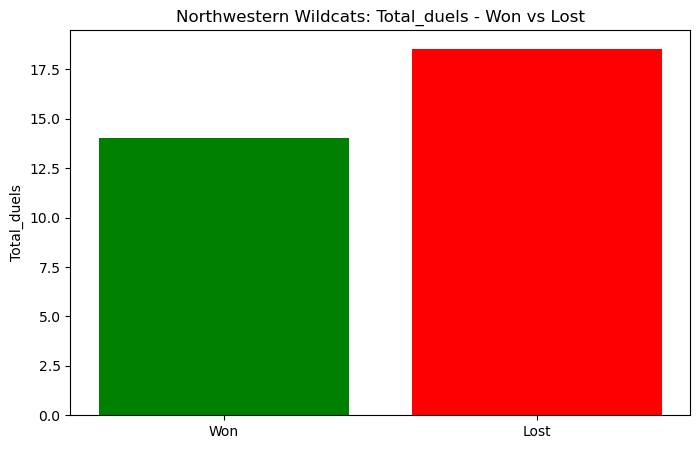

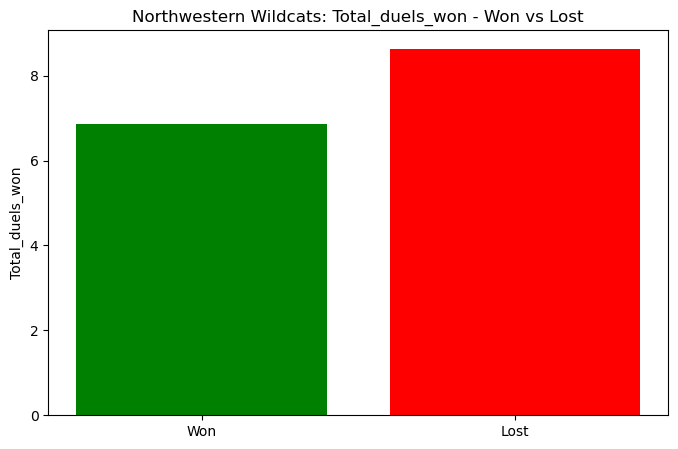

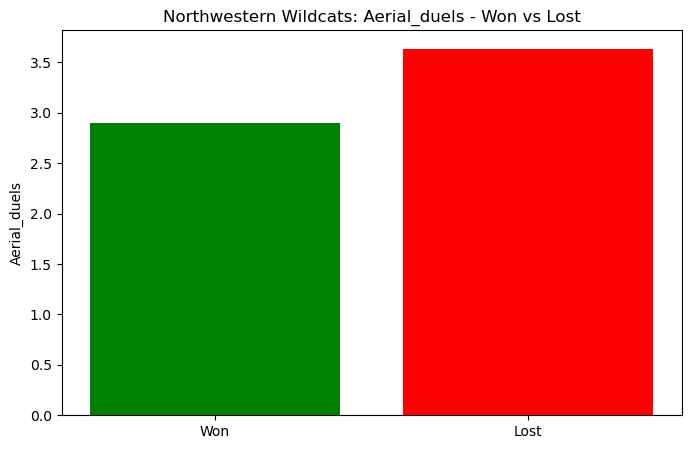

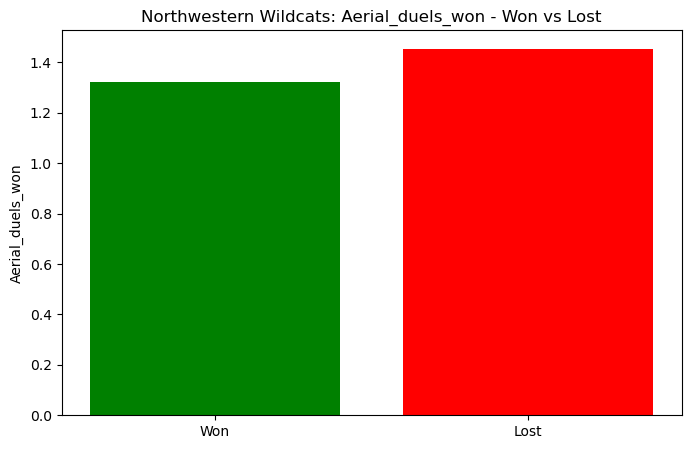

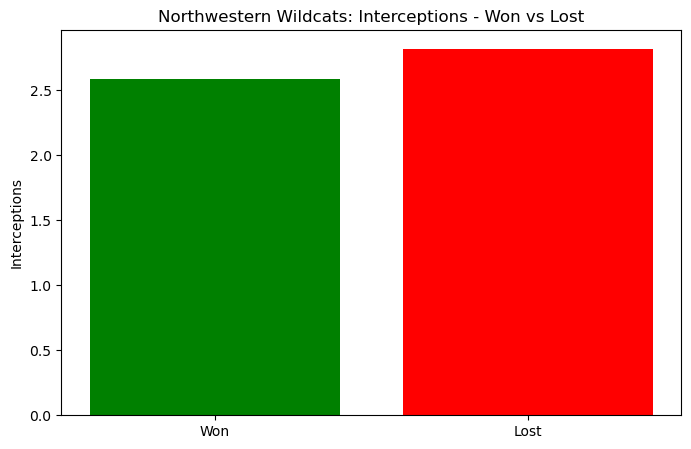

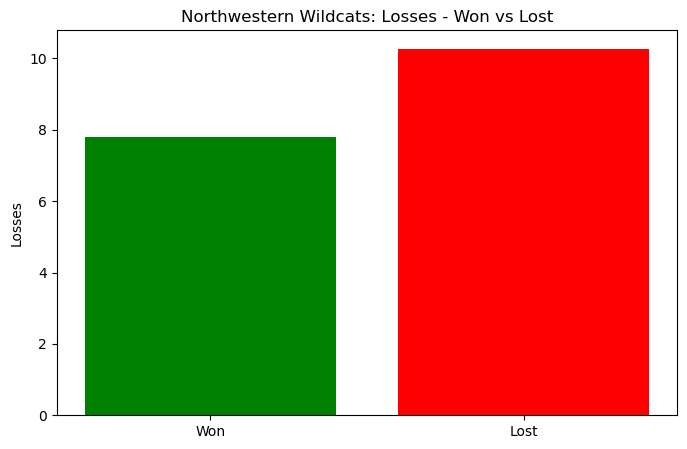

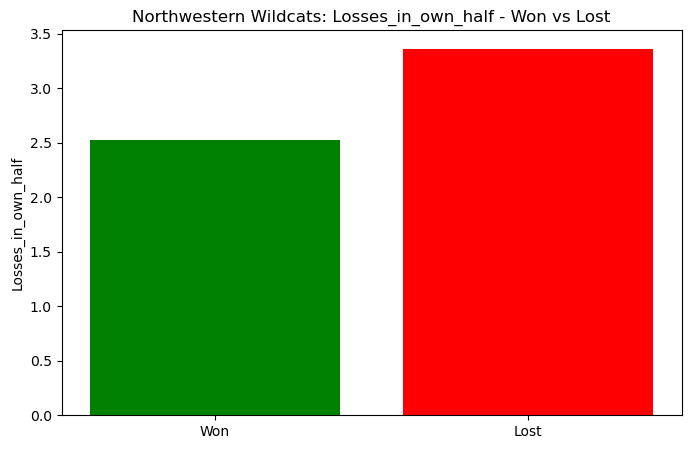

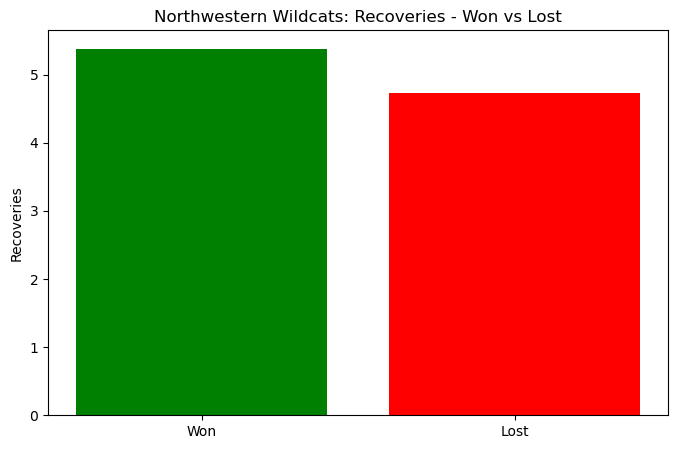

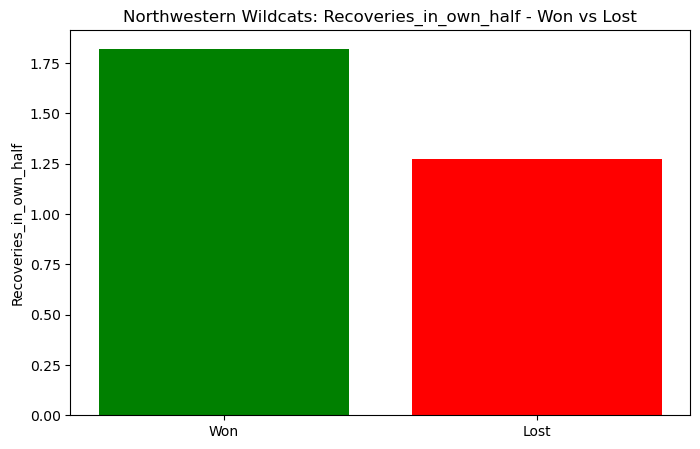

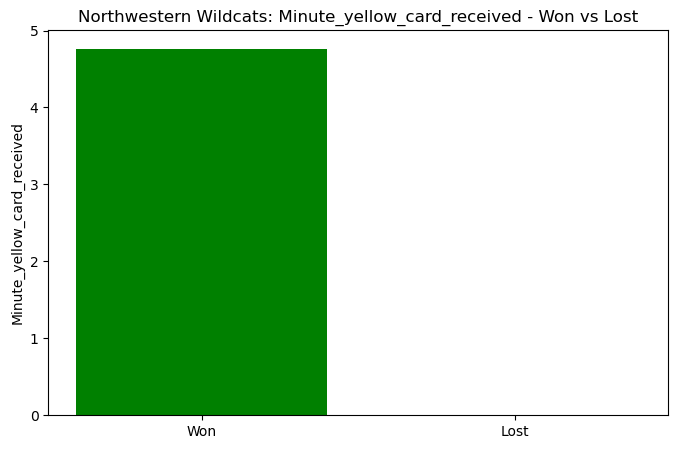

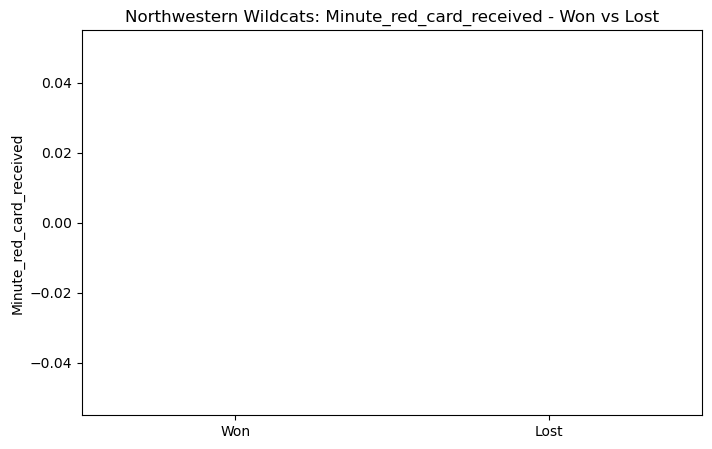

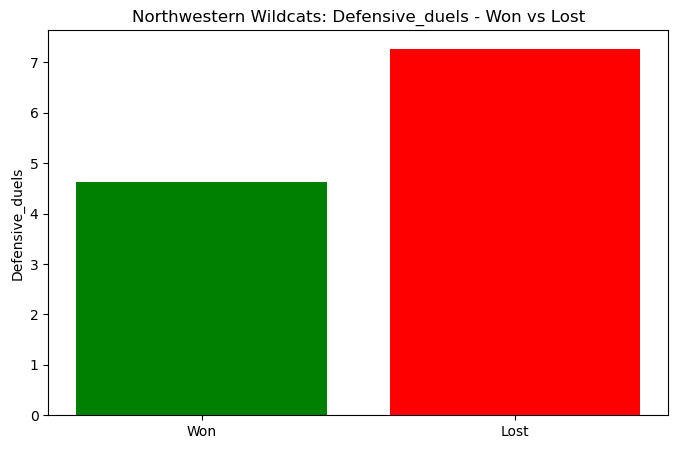

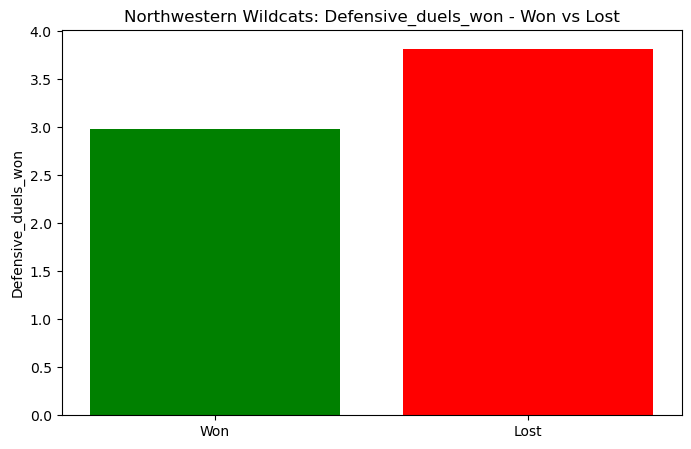

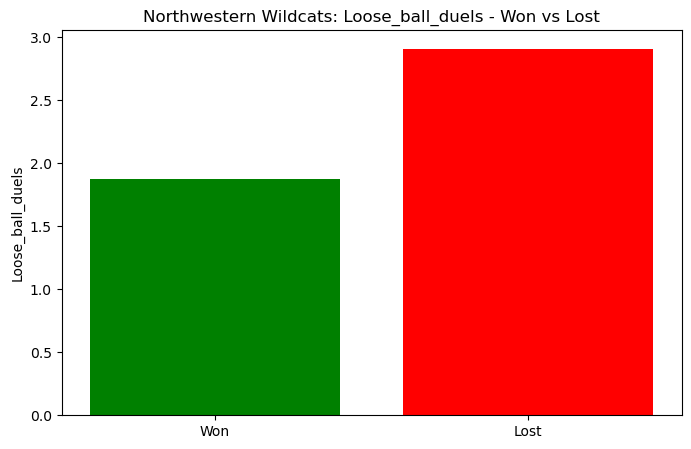

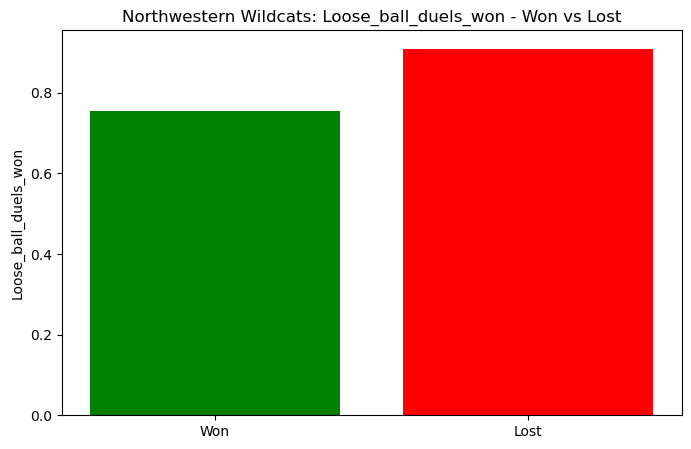

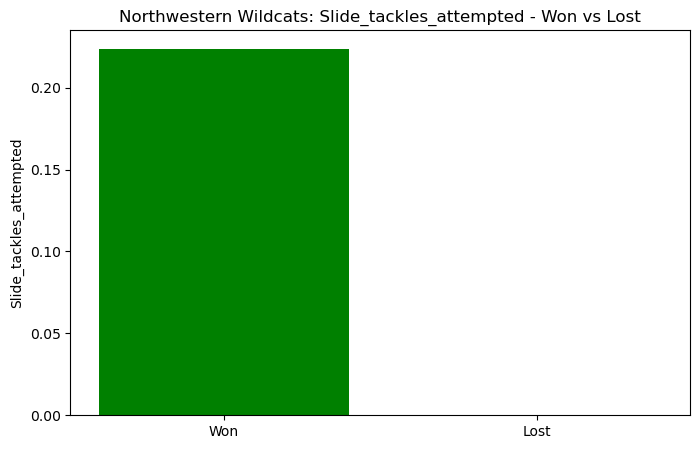

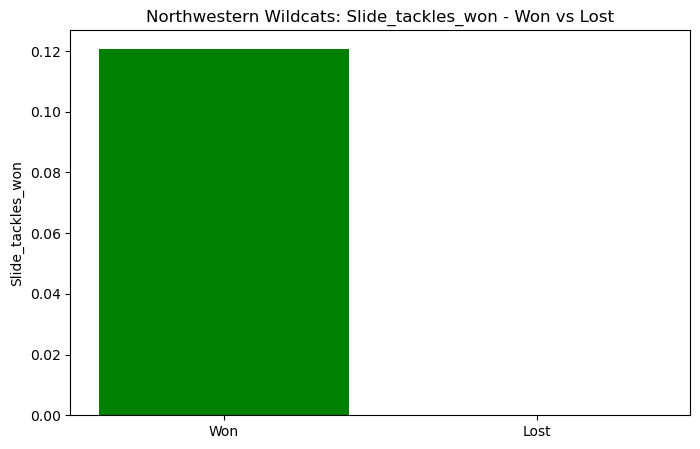

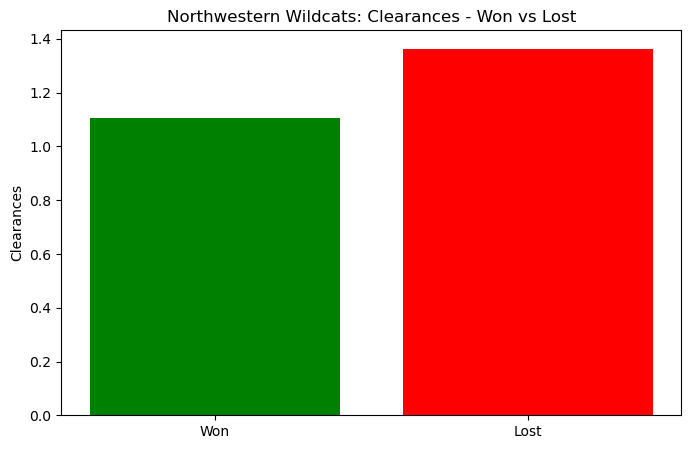

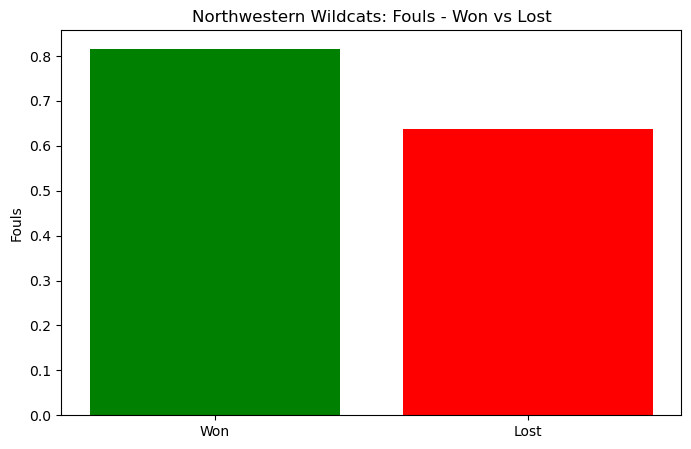

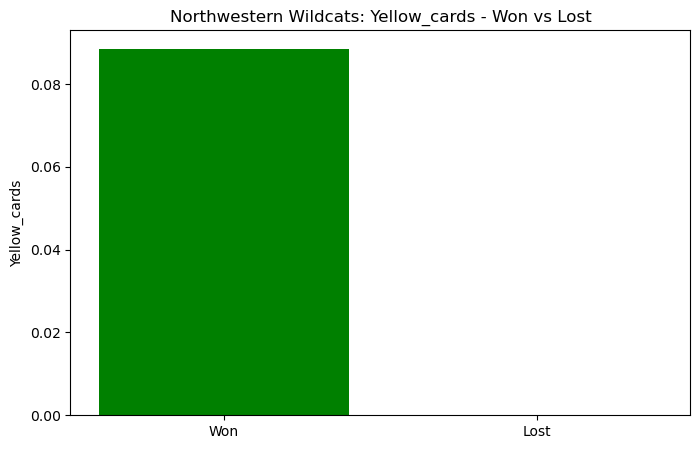

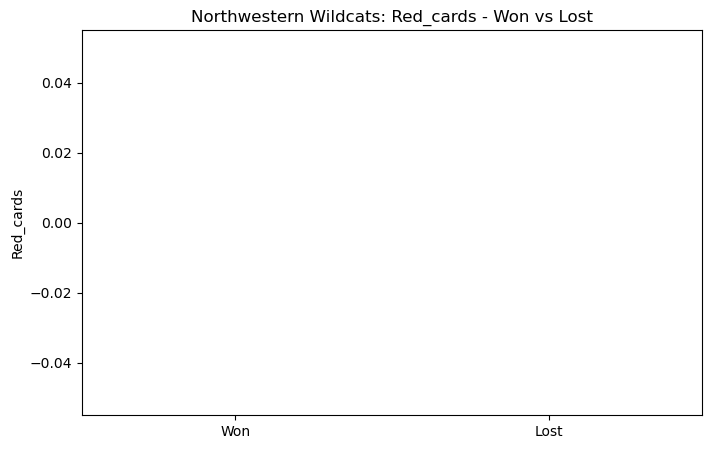

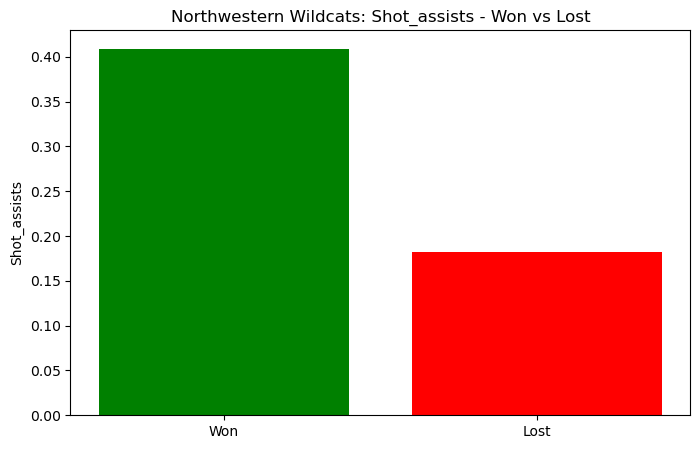

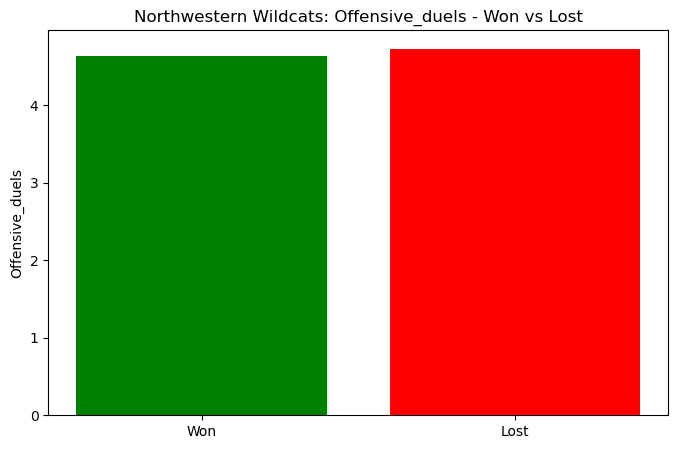

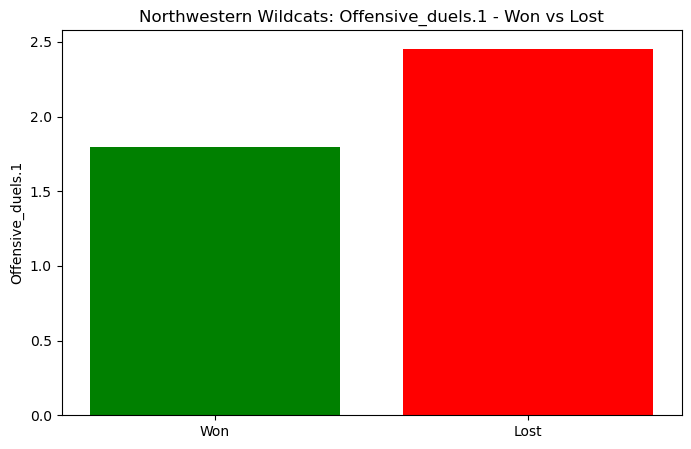

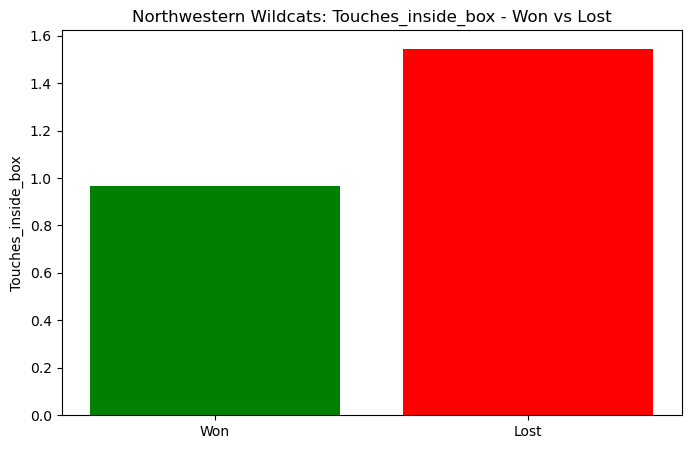

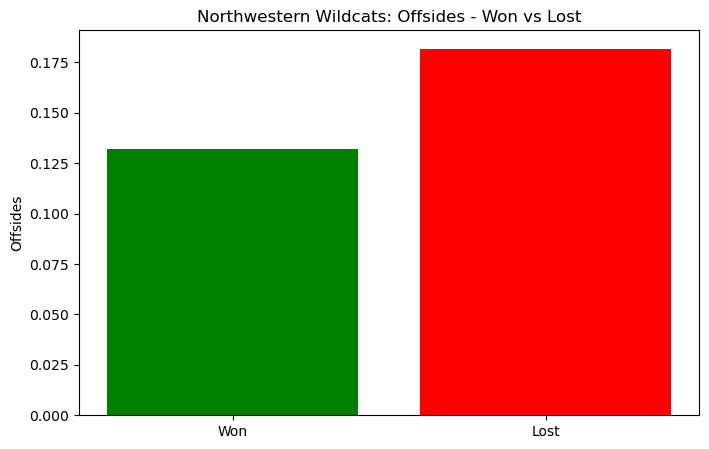

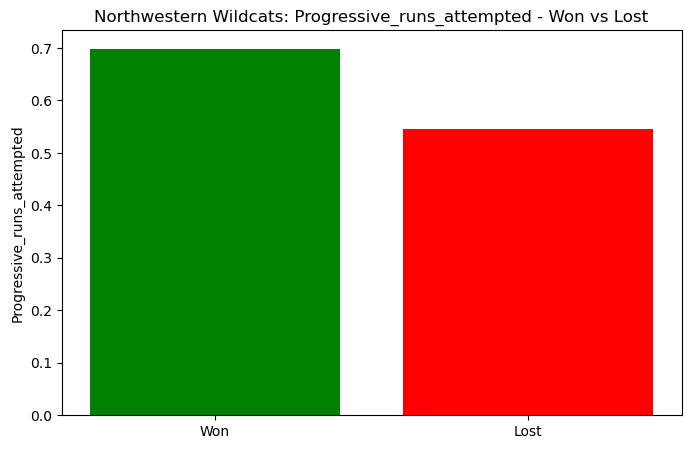

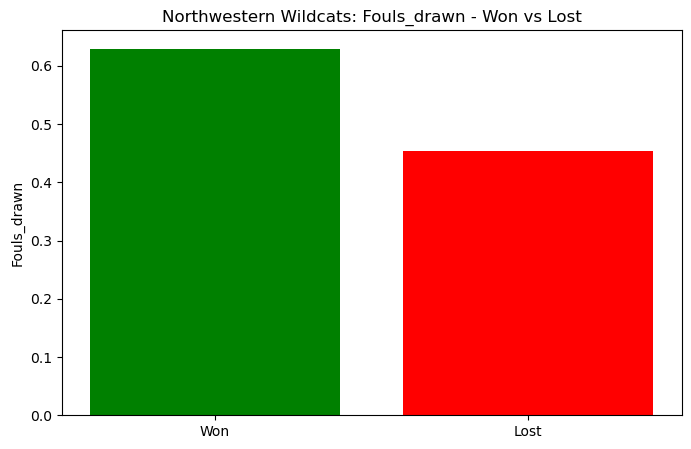

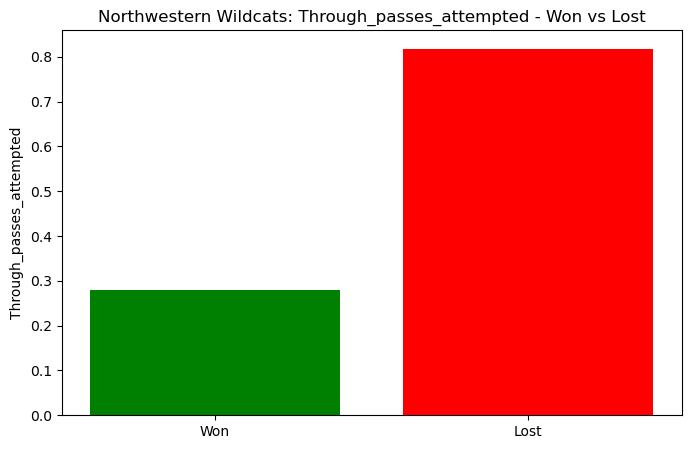

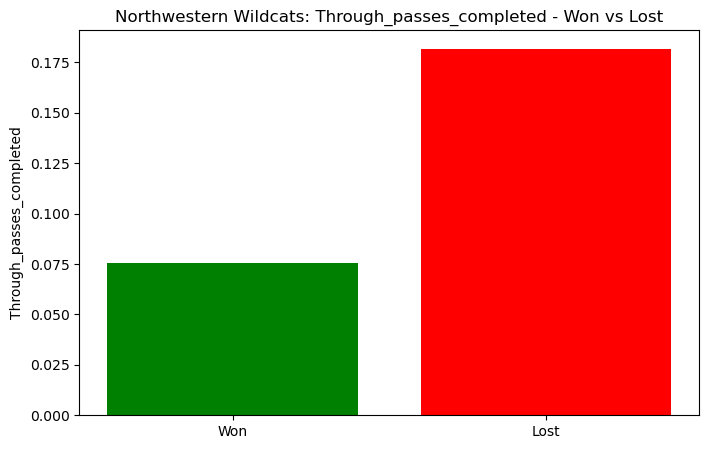

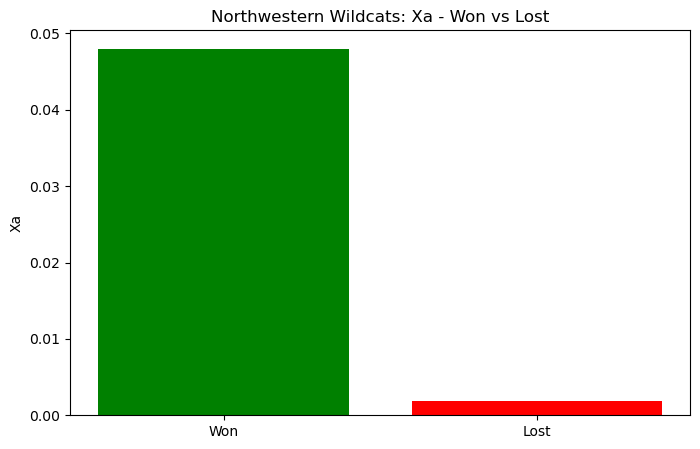

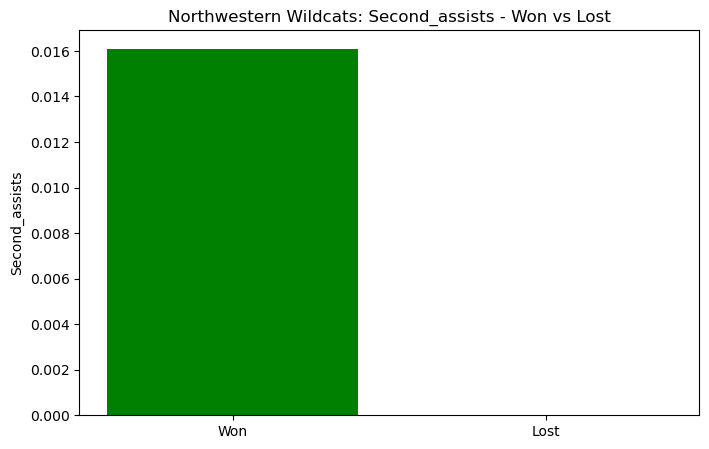

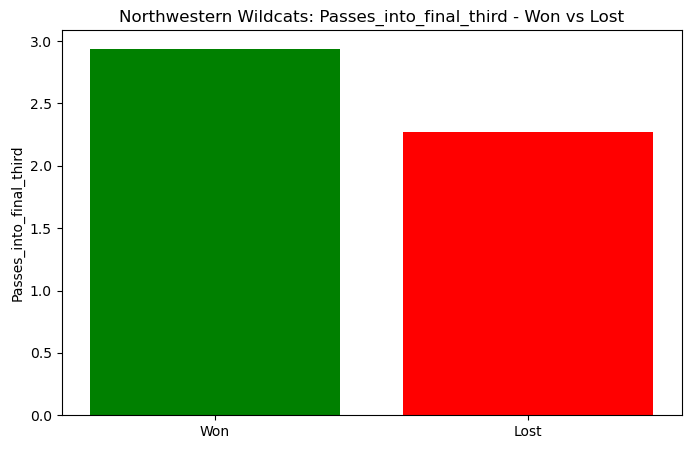

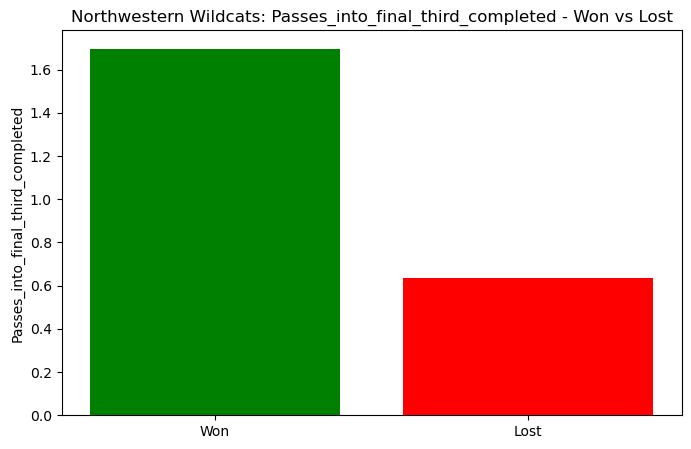

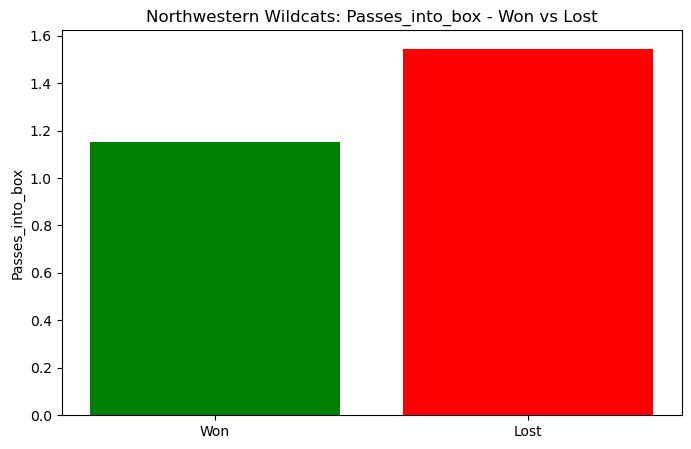

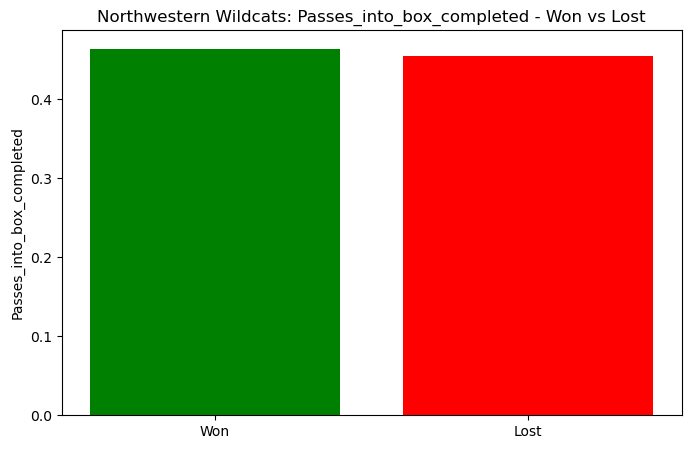

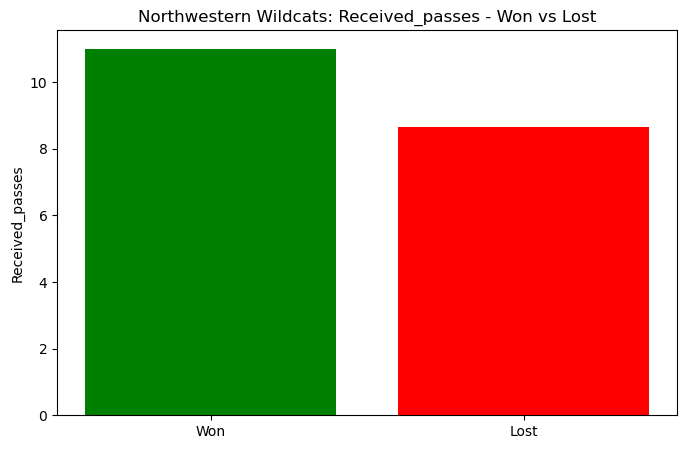

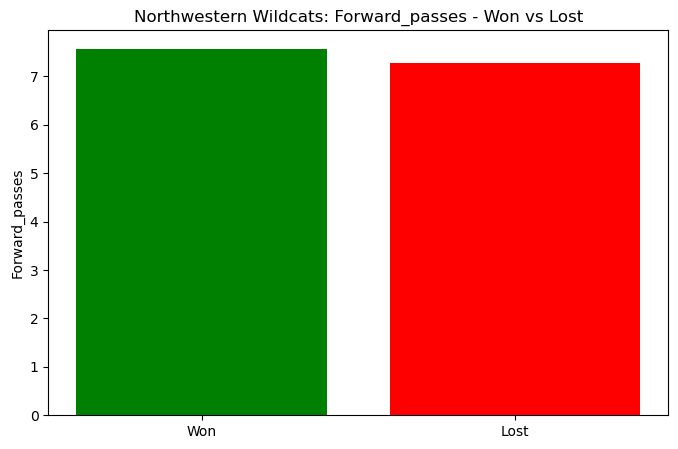

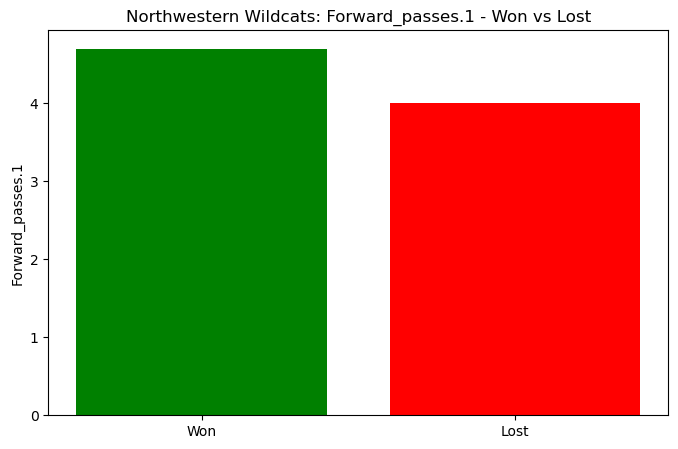

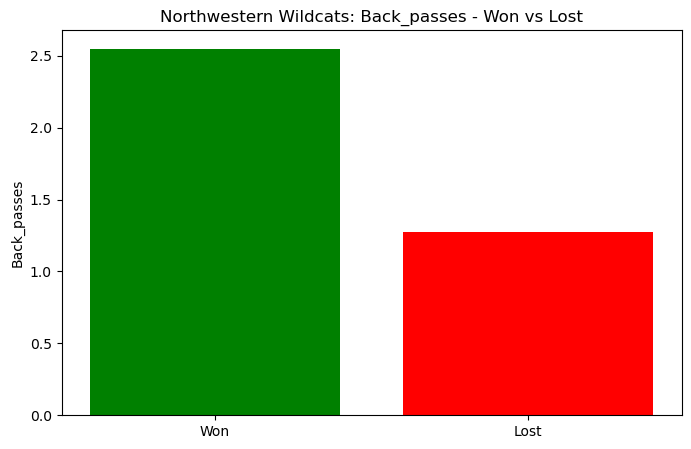

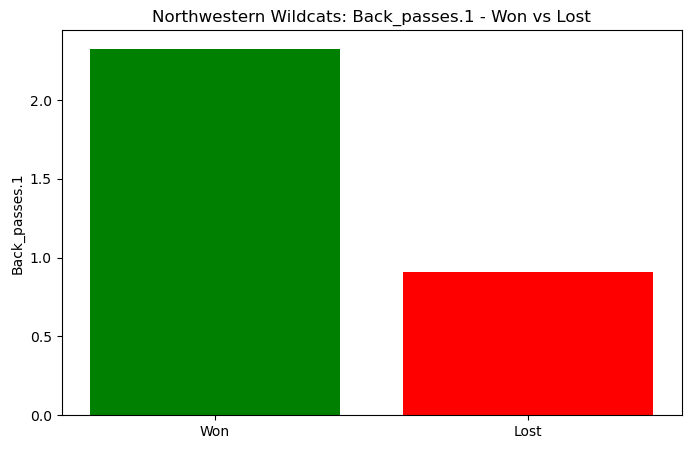

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data specifically for Northwestern Wildcats
northwestern_data = df[df['team'] == 'Northwestern Wildcats']

# Further filter matches won and lost for Northwestern
northwestern_wins = northwestern_data[northwestern_data['Result'].str.contains('Winner')]
northwestern_losses = northwestern_data[
    ~northwestern_data['Result'].str.contains('Winner') & 
    ~northwestern_data['Result'].str.contains('Draw')
]

# Select only numerical columns
numerical_columns = northwestern_data.select_dtypes(include=['number']).columns

# Calculate mean stats for matches won and lost
nw_stats_won = northwestern_wins[numerical_columns].mean()  # Stats for matches won
nw_stats_lost = northwestern_losses[numerical_columns].mean()  # Stats for matches lost

# Combine stats into a comparison DataFrame
comparison = pd.DataFrame({
    "Matches Won": nw_stats_won,
    "Matches Lost": nw_stats_lost
}).dropna()  # Drop columns with NaN values for clean comparison

# Display the comparison DataFrame
print("Comparison of Northwestern Wildcats' stats between matches won and lost:")
print(comparison)

# Visualization of key metrics
stats_to_compare =  numeric_cols # Replace with actual column names in your dataset
for stat in stats_to_compare:
    if stat in numerical_columns:  # Ensure the column exists
        plt.figure(figsize=(8, 5))
        plt.bar(['Won', 'Lost'], [nw_stats_won[stat], nw_stats_lost[stat]], color=['green', 'red'])
        plt.title(f"Northwestern Wildcats: {stat.capitalize()} - Won vs Lost")
        plt.ylabel(stat.capitalize())
        plt.show()
    else:
        print(f"Column '{stat}' not found in numerical data.")


In [10]:
# Filter matches into wins, losses, and draws
matches_won = df[df['Result'].str.contains('Winner')]  # Matches the team won
matches_lost = df[~df['Result'].str.contains('Winner') & ~df['Result'].str.contains('Draw')]  # Matches the team lost
matches_drawn = df[df['Result'].str.contains('Draw')]  # Matches that ended in a draw

# Group by player_name, team, and position for each outcome
player_team_position_wins = matches_won.groupby(['player_name', 'team', 'Position']).size().reset_index(name='Wins')
player_team_position_losses = matches_lost.groupby(['player_name', 'team', 'Position']).size().reset_index(name='Losses')
player_team_position_draws = matches_drawn.groupby(['player_name', 'team', 'Position']).size().reset_index(name='Draws')

# Merge the three datasets
player_team_position_stats = pd.merge(
    player_team_position_wins, 
    player_team_position_losses, 
    on=['player_name', 'team', 'Position'], 
    how='outer'
)
player_team_position_stats = pd.merge(
    player_team_position_stats, 
    player_team_position_draws, 
    on=['player_name', 'team', 'Position'], 
    how='outer'
).fillna(0)  # Fill NaN values with 0

# Ensure Wins, Losses, and Draws are integers
player_team_position_stats['Wins'] = player_team_position_stats['Wins'].astype(int)
player_team_position_stats['Losses'] = player_team_position_stats['Losses'].astype(int)
player_team_position_stats['Draws'] = player_team_position_stats['Draws'].astype(int)

# Display the resulting DataFrame
print(player_team_position_stats)

# Save to a CSV file
player_team_position_stats.to_csv('player_team_position_stats.csv', index=False)

# Count the occurrences of each player in the dataset
player_occurrences = df['player_name'].value_counts().reset_index()

# Rename the columns for clarity
player_occurrences.columns = ['player_name', 'Occurrences']

# Merge this count back into the main dataset
player_team_position_stats = pd.merge(
    player_team_position_stats, 
    player_occurrences, 
    on='player_name', 
    how='left'
)

# Display the updated DataFrame
print(player_team_position_stats)

# Save the updated DataFrame to a CSV file
player_team_position_stats.to_csv('player_team_position_stats_with_occurrences.csv', index=False)

# Ensure 'Occurrences' column exists (total matches played by each player)
if 'Occurrences' not in player_team_position_stats.columns:
    player_occurrences = df['player_name'].value_counts().reset_index()
    player_occurrences.columns = ['player_name', 'Occurrences']
    player_team_position_stats = pd.merge(
        player_team_position_stats, 
        player_occurrences, 
        on='player_name', 
        how='left'
    )

# Calculate percentages for Wins, Losses, and Draws
player_team_position_stats['Win Percentage'] = (player_team_position_stats['Wins'] / player_team_position_stats['Occurrences']) * 100
player_team_position_stats['Loss Percentage'] = (player_team_position_stats['Losses'] / player_team_position_stats['Occurrences']) * 100
player_team_position_stats['Draw Percentage'] = (player_team_position_stats['Draws'] / player_team_position_stats['Occurrences']) * 100

# Handle missing or zero occurrences
player_team_position_stats = player_team_position_stats.fillna(0)

# Display the updated DataFrame
print(player_team_position_stats)

# Save the updated DataFrame to a CSV file
player_team_position_stats.to_csv('player_team_position_stats_with_occurrences.csv', index=False)


           player_name                     team    Position  Wins  Losses  \
0     A. Adalsteinsson  Rutgers Scarlet Knights          CB     2       0   
1     A. Adalsteinsson  Rutgers Scarlet Knights     CB, LCB     1       0   
2     A. Adalsteinsson  Rutgers Scarlet Knights     CB, RCB     2       0   
3     A. Adalsteinsson  Rutgers Scarlet Knights         LCB     5       0   
4     A. Adalsteinsson  Rutgers Scarlet Knights    LCB, RCB     1       0   
...                ...                      ...         ...   ...     ...   
2931         Z. Ramsey       Washington Huskies    LAMF, LW     0       0   
2932         Z. Ramsey       Washington Huskies  LAMF, RAMF     1       0   
2933         Z. Ramsey       Washington Huskies          LW     3       0   
2934         Z. Ramsey       Washington Huskies      LW, RW     1       0   
2935         Z. Ramsey       Washington Huskies        RAMF     1       0   

      Draws  
0         1  
1         0  
2         0  
3         1  
4    

In [11]:
# Group by player_name and position and calculate total percentages
player_position_stats = player_team_position_stats.groupby(['player_name', 'Position']).agg({
    'Win Percentage': 'sum',
    'Loss Percentage': 'sum',
    'Draw Percentage': 'sum'
}).reset_index()

# Display the resulting table
print(player_position_stats)

# Save the resulting table to a CSV file
player_position_stats.to_csv('player_position_stats_with_position_percentage.csv', index=False)


           player_name    Position  Win Percentage  Loss Percentage  \
0     A. Adalsteinsson          CB       14.285714              0.0   
1     A. Adalsteinsson     CB, LCB        7.142857              0.0   
2     A. Adalsteinsson     CB, RCB       14.285714              0.0   
3     A. Adalsteinsson         LCB       35.714286              0.0   
4     A. Adalsteinsson    LCB, RCB        7.142857              0.0   
...                ...         ...             ...              ...   
2788         Z. Ramsey    LAMF, LW        0.000000              0.0   
2789         Z. Ramsey  LAMF, RAMF        7.142857              0.0   
2790         Z. Ramsey          LW       21.428571              0.0   
2791         Z. Ramsey      LW, RW        7.142857              0.0   
2792         Z. Ramsey        RAMF        7.142857              0.0   

      Draw Percentage  
0            7.142857  
1            0.000000  
2            0.000000  
3            7.142857  
4            0.000000  
...

In [12]:
# Define columns for successful actions and total actions
# Replace with your dataset's actual column names for these metrics
successful_actions_cols = ['successful_actions']
total_actions_cols = ['total_actions']

# Ensure the required columns exist in the DataFrame
available_successful_actions = [col for col in successful_actions_cols if col in df.columns]
available_total_actions = [col for col in total_actions_cols if col in df.columns]

# Calculate successful actions and total actions
df['Successful Actions'] = df[available_successful_actions].sum(axis=1)
df['Total Actions'] = df[available_total_actions].sum(axis=1)

# Calculate action efficiency
df['Action Efficiency'] = df['Successful Actions'] / df['Total Actions']

# Handle cases where Total Actions is 0 to avoid division by zero
df['Action Efficiency'] = df['Action Efficiency'].fillna(0)

# Select relevant columns for the table
action_table = df[['player_name', 'team', 'Position', 'Match', 'Minutes played', 
                   'Successful Actions', 'Total Actions', 'Action Efficiency']]

# Sort the table for clarity (optional)
action_table = action_table.sort_values(by=['player_name', 'Match'])

# Display the resulting table
print(action_table)

# Calculate average action efficiency for each player and position
position_efficiency = action_table.groupby(['player_name', 'Position'])['Action Efficiency'].mean().reset_index()

# Find the position with the highest average efficiency for each player
best_positions = position_efficiency.loc[position_efficiency.groupby('player_name')['Action Efficiency'].idxmax()]

# Merge the best position back into the main action table
action_table = pd.merge(
    action_table, 
    best_positions[['player_name', 'Position']], 
    on='player_name', 
    suffixes=('', '_Best')
)

# Rename the "Position_Best" column for clarity
action_table.rename(columns={'Position_Best': 'Best Position'}, inplace=True)

# Display the updated table
print(action_table)

# Save the table to a CSV file
action_table.to_csv('player_action_table.csv', index=False)


           player_name                     team Position  \
4643  A. Adalsteinsson  Rutgers Scarlet Knights      LCB   
4639  A. Adalsteinsson  Rutgers Scarlet Knights       CB   
4636  A. Adalsteinsson  Rutgers Scarlet Knights      LCB   
4645  A. Adalsteinsson  Rutgers Scarlet Knights       CB   
4641  A. Adalsteinsson  Rutgers Scarlet Knights  CB, RCB   
...                ...                      ...      ...   
8525         Z. Ramsey       Washington Huskies   LW, RW   
8532         Z. Ramsey       Washington Huskies       LW   
8529         Z. Ramsey       Washington Huskies   LW, RW   
8527         Z. Ramsey       Washington Huskies     LAMF   
8535         Z. Ramsey       Washington Huskies     RAMF   

                                                  Match  Minutes played  \
4643  Lehigh Mountain Hawks - Rutgers Scarlet Knight...              30   
4639  Ohio State Buckeyes - Rutgers Scarlet Knights 3:0              37   
4636  Penn State Nittany Lion - Rutgers Scarlet Knig..

In [13]:
# Filter rows where the position contains 'F' (e.g., CF, LF, RF)
forward_data = df[df['Position'].str.contains('F', na=False)]

# Include metrics for forwards
forward_metrics = forward_data[['player_name', 'Position', 'xg', 'shots', 'shots_on_target', 'goals']]

# Combine and sum metrics for the same player and position
forward_combined = forward_metrics.groupby(['player_name', 'Position']).sum().reset_index()

# Filter players with non-zero shots
forward_combined = forward_combined[forward_combined['shots'] > 0]

# Check if players have made goals in other positions
# Group by player_name and Position to count goals
goals_in_other_positions = df[df['goals'] > 0].groupby(['player_name', 'Position'])['goals'].sum().reset_index()

# Filter rows where position does not contain 'F'
goals_in_other_positions = goals_in_other_positions[~goals_in_other_positions['Position'].str.contains('F', na=False)]

# Merge goals in other positions into the forward table
forward_combined = pd.merge(
    forward_combined, 
    goals_in_other_positions[['player_name', 'Position', 'goals']],
    on=['player_name', 'Position'], 
    how='left', 
    suffixes=('', '_Other_Position')
)

# Fill NaN values with 0 for goals in other positions
forward_combined['goals_Other_Position'] = forward_combined['goals'].fillna(0).astype(int)

# Drop duplicate 'goals' column after merge
forward_combined = forward_combined.drop(columns='goals')

# Display the final table
print(forward_combined)

# Save the table to a CSV file
forward_combined.to_csv('forward_combined_with_other_position_goals.csv', index=False)

     player_name    Position    xg  shots  shots_on_target  \
0       A. Bilow          CF  0.23      3                1   
1       A. Bilow        LAMF  0.27      1                1   
2       A. Bilow    LCMF, RW  0.06      2                1   
3       A. Bilow      LW, CF  0.54      5                4   
4       A. Bilow   LW, RCMF3  0.26      3                0   
...          ...         ...   ...    ...              ...   
1194  Z. Martens        RCMF  0.03      1                1   
1195   Z. Ramsey         AMF  0.05      1                0   
1196   Z. Ramsey        LAMF  0.53      2                1   
1197   Z. Ramsey    LAMF, LW  0.09      1                1   
1198   Z. Ramsey  LAMF, RAMF  0.31      1                0   

      goals_Other_Position  
0                        1  
1                        1  
2                        0  
3                        0  
4                        0  
...                    ...  
1194                     0  
1195                   

In [14]:
# Filter rows where the position contains 'F' (e.g., CF, LF, RF)
forward_data = df[df['Position'].str.contains('F', na=False)]

# Include metrics for forwards
forward_metrics = forward_data[['player_name', 'Position', 'xg', 'shots', 'shots_on_target', 'goals']]

# Combine and sum metrics for the same player and position
forward_combined = forward_metrics.groupby(['player_name', 'Position']).sum().reset_index()

# Filter players with non-zero shots
forward_combined = forward_combined[forward_combined['shots'] > 0]

# Calculate Shot Accuracy
forward_combined['Shot Accuracy (%)'] = (forward_combined['shots_on_target'] / forward_combined['shots']) * 100

# Display the final table
print(forward_combined)

# Save the table to a CSV file
forward_combined.to_csv('forward_combined_with_shot_accuracy.csv', index=False)


     player_name    Position    xg  shots  shots_on_target  goals  \
1       A. Bilow          CF  0.23      3                1      1   
2       A. Bilow        LAMF  0.27      1                1      1   
4       A. Bilow    LCMF, RW  0.06      2                1      0   
5       A. Bilow      LW, CF  0.54      5                4      0   
6       A. Bilow   LW, RCMF3  0.26      3                0      0   
...          ...         ...   ...    ...              ...    ...   
1835  Z. Martens        RCMF  0.03      1                1      0   
1838   Z. Ramsey         AMF  0.05      1                0      0   
1839   Z. Ramsey        LAMF  0.53      2                1      1   
1840   Z. Ramsey    LAMF, LW  0.09      1                1      0   
1841   Z. Ramsey  LAMF, RAMF  0.31      1                0      0   

      Shot Accuracy (%)  
1             33.333333  
2            100.000000  
4             50.000000  
5             80.000000  
6              0.000000  
...            

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the data (assuming forward_combined already exists)
data = forward_combined.copy()

# Create a target variable for goal (1 if goals > 0, 0 otherwise)
data['goal_scored'] = (data['goals'] > 0).astype(int)

# Encode the 'Position' column
position_encoder = LabelEncoder()
data['Position_encoded'] = position_encoder.fit_transform(data['Position'])

# Define features (X) and target (y)
X = data[['shots', 'xg', 'shots_on_target', 'Position_encoded']]
y = data['goal_scored']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost Classifier
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")

# Save a table with player, position, and predictions
player_position_table = data[['player_name', 'Position', 'shots', 'xg', 'shots_on_target', 'goal_scored']]
player_position_table.to_csv('player_position_prediction_table_xgboost.csv', index=False)

print("\nSaved table with player and position details.")

# Create a test function for goal prediction
def predict_goal(player_name, position, shots, xg, shots_on_target):
    # Encode position
    position_encoded = position_encoder.transform([position])[0]
    
    # Prepare the feature vector
    test_data = pd.DataFrame([{
        'shots': shots,
        'xg': xg,
        'shots_on_target': shots_on_target,
        'Position_encoded': position_encoded
    }])
    
    # Make prediction
    prediction = model.predict(test_data)[0]
    probability = model.predict_proba(test_data)[0][1]
    
    # Return result
    result = "Goal likely" if prediction == 1 else "Goal unlikely"
    print(f"Prediction for {player_name} playing as {position}: {result} (Probability: {probability:.2f})")

# Example Test
predict_goal("John Doe", "CF", shots=5, xg=1.2, shots_on_target=3)


ModuleNotFoundError: No module named 'xboost'

In [17]:
conda install -c conda-forge xgboost


Retrieving notices: ...working... done
Channels:
 - conda-forge
 - defaults
 - pytorch
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          12 KB  conda-forge
    libxgboost-2.1.2           |   cpu_h549eda0_1         1.3 MB  conda-forge
    llvm-openmp-19.1.4         |       hdb05f8b_0         275 KB  conda-forge
    py-xgboost-2.1.2           | cpu_pyhd3de297_1         131 KB  conda-forge
    pytorch-2.3.0              |gpu_mps_py312hf36b297_100        54.3 MB
    sleef-3.7                  |       h8391f65_2         569 KB  conda-forge
    xgboost-2.1.2              | cpu_pyhac85b48_1          15 KB  conda-forge
    ------------------------------------------------------------
               